In [ ]:
#packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#loading the dataset
data=pd.read_csv('/content/iris.csv')

EXPLORATORY ANALYSIS

In [ ]:
data.shape
#dataset has 150 intances and 5 columns.

(150, 5)

In [ ]:
data.head()
#first five rows of dataset.

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
data.info()
#information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum()
#no null values

,0
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


In [ ]:
data.describe()
#description

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.columns
#columns in dataset

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
data['variety'].unique()
#class labels

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
data['variety'].value_counts()
#classlabels and its count

,count
variety,
Setosa,50
Versicolor,50
Virginica,50


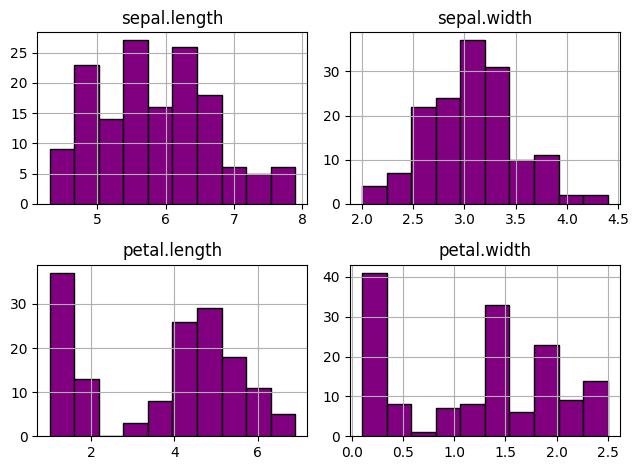

In [ ]:
data.drop('variety',axis=1).hist(linewidth=1,edgecolor='black',color='purple')
plt.tight_layout()
plt.show()

#frequency of values of each feature in the dataset



*   largest sepal length ranges between 5.3 and 5.7
*   largest sepal width ranges between 2.9 and 3.2
*   largest petal length ranges between 1 and 1.5
*   largest petal width ranges between 0.1 and 0.3
*   smallest sepal length ranges between 7.2 and 7.5
*   smallest sepal width ranges between 3.9 and 4.4
*   smallest petal length ranges between 2.6 and 3.4
*   smallest petal width ranges between 0.6 and 0.8

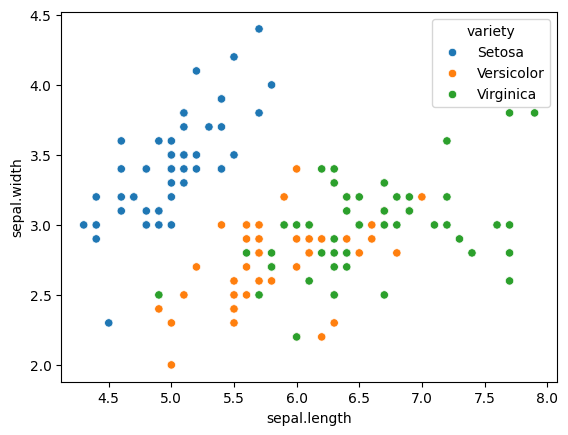

In [ ]:
sns.scatterplot(data=data,x='sepal.length',y='sepal.width',hue='variety')
plt.show()



1.   setosa has shorter sepal length and largest sepal width
2.   virginica has largest sepal length
3.   versicolor has shorter sepal length and sepal width compared to virginica



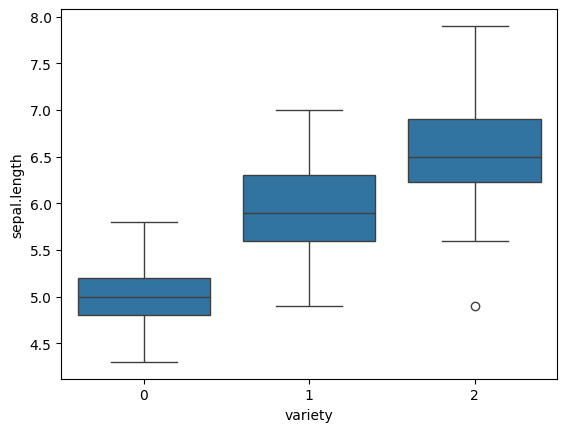

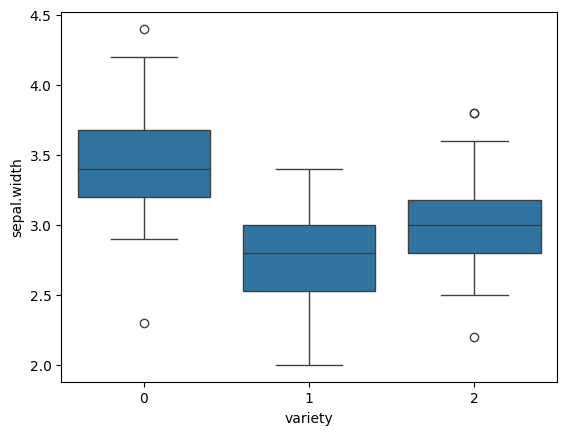

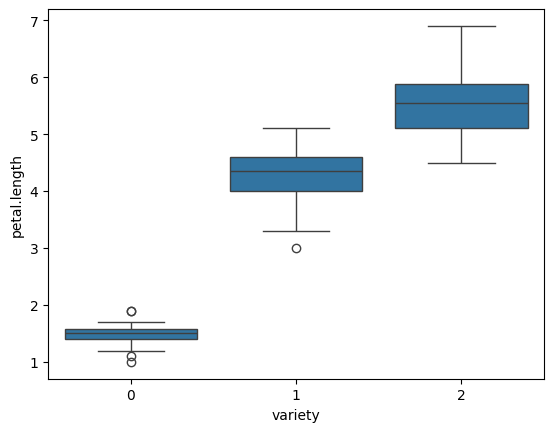

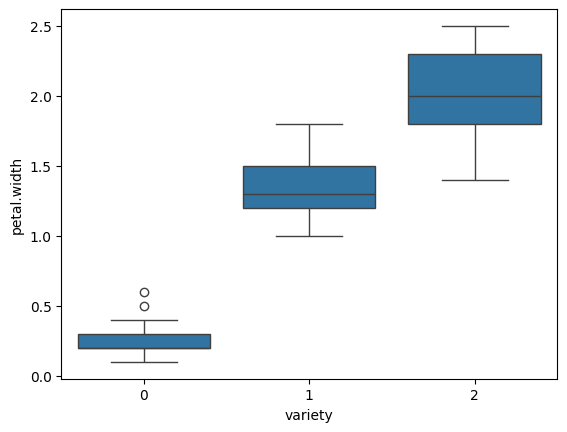

In [ ]:
sns.boxplot(data=data,x='variety',y='sepal.length')
plt.show()
sns.boxplot(data=data,x='variety',y='sepal.width')
plt.show()
sns.boxplot(data=data,x='variety',y='petal.length')
plt.show()
sns.boxplot(data=data,x='variety',y='petal.width')
plt.show()



1.   setosa has largest sepal width
2.   virginica has largest sepal length,petal length,petal width
1.   virginica and versicolor has similar sepal width
2.   setosa has very small petal width and length and narrow range of petal width and length





In [ ]:
data['variety']=LabelEncoder().fit_transform(data['variety'])
#converting variety which is categorical to numerical

In [ ]:
#splitting the dataset
X=data.drop('variety',axis=1)
y=data['variety']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#model creation and training
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#testing
y_pred=model.predict(X_test)

In [ ]:
#//////////////////////////for testing purpose
print(y_test.values)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[ 1.23071715 -0.04010441  2.21970287  1.34966889  1.28429336  0.02248402
  1.05726124  1.82403704  1.36824643  1.06766437  1.70031437 -0.07357413
 -0.15562919 -0.06569402 -0.02128628  1.39659966  2.00022876  1.04812731
  1.28102792  1.97283506  0.03184612  1.59830192  0.09450931  1.91807547
  1.83296682  1.87877315  1.78781234  2.03362373  0.03594506  0.02619043]


In [ ]:
#results
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
print('Slope:',model.coef_)
print('Intercept:',model.intercept_)

Mean Squared Error: 0.03711379440797686
R2 Score: 0.9468960016420045
Slope: [-0.11633479 -0.05977785  0.25491375  0.54759598]
Intercept: 0.2525275898181468


In [ ]:
confusionmatrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
print(confusionmatrix)

Predicted  -0.155629  -0.073574  -0.065694  -0.040104  -0.021286   0.022484  \
Actual                                                                        
0                  1          1          1          1          1          1   
1                  0          0          0          0          0          0   
2                  0          0          0          0          0          0   

Predicted   0.026190   0.031846   0.035945   0.094509  ...   1.700314  \
Actual                                                 ...              
0                  1          1          1          1  ...          0   
1                  0          0          0          0  ...          0   
2                  0          0          0          0  ...          1   

Predicted   1.787812   1.824037   1.832967   1.878773   1.918075   1.972835  \
Actual                                                                        
0                  0          0          0          0          0          0   
1

In [ ]:
#unseen data prediction
sepal_length=float(input('Enter sepal length:'))
sepal_width=float(input('Enter sepal width:'))
petal_length=float(input('Enter petal length:'))
petal_width=float(input('Enter petal width:'))
input_data=[[sepal_length,sepal_width,petal_length,petal_width]]
result=model.predict(input_data)
class_labels=['Setosa','Versicolor','Virginica']
print(class_labels[round(result[0])])